# About Dataset

Dataset contains basic data about people like their name, age, gender and race. Along with it, is the shooting/killing information, like date of event, where it happened? how they were shot? did they attack? Were they holding weapons? Did they show any mental illness? Was the policeman wearing a camera/was the incident recorded? Did the suspect flee? Apart from that, a category column holds type of weapon used by the suspect

<font size="+2" color=green ><b>Please Upvote my kernel if you like my work</b></font>

# Table of contents

- <a href='#1'>1. Importing Libraries and Dataset </a> 
- <a href='#2'>2. Exploring data</a> 
- <a href='#3'>3. How they are killed ? </a> 
- <a href='#4'>4. What weapons used most frequently? </a> 
- <a href='#5'>5. Gender ratio </a>
- <a href='#6'>6. Frequency of different race </a> 
- <a href='#7'>7. Number of deaths (2015-20) </a> 
- <a href='#8'>8. Age distribution</a>
- <a href='#9'>9. Age distribution Male vs Female </a>
- <a href='#10'>10. Age distribution of different race </a>
- <a href='#11'>11. No of deaths (state-wise) </a>
- <a href='#12'>12. Signs of Mental illness </a>
- <a href='#13'>13. Threat level </a>
- <a href='#14'>14. Number of deaths by Gender,year,race </a>
- <a href='#15'>15. Top 20 cities where most shooting occurred </a>
- <a href='#16'>16. US Police shooting cases of black people (2015-2020)

# <a id='1'> 1. Importing Libraries and Dataset</a>

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# Import dataset

In [ ]:
data=pd.read_csv('../input/us-police-shootings/shootings.csv')

# <a id='2'> 2. Exploring data</a>

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.shape

# <a id='3'> 3. How they are killed ? </a>

In [ ]:
df=data['manner_of_death'].value_counts().reset_index().rename(columns={'index':'manner_of_death','manner_of_death':'count'})

fig = go.Figure(go.Bar(
    x=df['manner_of_death'],y=df['count'],marker_color='purple'
))
fig.update_layout(title_text='Frequency of reason of death',xaxis_title="manner of death",yaxis_title="count",height=500,width=500)
fig.show()

# <a id='4'> 4. What weapons used most frequently? </a>

In [ ]:
df=data['armed'].value_counts().reset_index().rename(columns={'index':'weapons used','armed':'count'})

fig = go.Figure(go.Bar(
    x=df['weapons used'],y=df['count'],marker_color='#7b6de3'
))
fig.update_layout(title_text='Frequency of different weapons used',xaxis_title="weapons used",yaxis_title="count",height=700,width=1000)
fig.show()

In [ ]:
fig = go.Figure([go.Pie(labels=df['weapons used'],values=df['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="Frequency of different weapons used",title_x=0.5)
fig.show()

# <a id='5'> 5. Gender ratio </a>

In [ ]:
df=data['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})

fig = go.Figure(go.Bar(
    x=df['gender'],y=df['count'],marker_color='#148edb'
))
fig.update_layout(title_text='gender ratio',xaxis_title="gender",yaxis_title="count",height=500,width=500)
fig.show()

# <a id='6'> 6. Frequency of different race </a>

In [ ]:
df=data.groupby('date')['manner_of_death'].count().reset_index()
df['date']=pd.to_datetime(df['date'])
df['year-month'] = df['date'].apply(lambda x: str(x.year) + '-' + str(x.month))
df_ym=df.groupby('year-month')[['manner_of_death']].sum().reset_index()
df_ym['year-month']=pd.to_datetime(df_ym['year-month'])
df_ym=df_ym.sort_values('year-month')

In [ ]:
df=data['race'].value_counts().reset_index().rename(columns={'index':'race','race':'count'})

fig = go.Figure(go.Bar(
    x=df['race'],y=df['count'],
    marker={'color': df['count'], 
    'colorscale': 'Viridis'},  
))
fig.update_layout(title_text='frequency of different race',xaxis_title="race",yaxis_title="count",height=500,width=500)
fig.show()

# <a id='7'> 7. Number of deaths (2015-20) </a>

In [ ]:
fig = go.Figure(go.Bar(
    x=df_ym['year-month'],y=df_ym['manner_of_death'],
    marker={'color': df_ym['manner_of_death'], 
    'colorscale': 'Viridis'},  
    text=df_ym['manner_of_death'],
    textposition = "outside",
))
fig.update_layout(title_text='No of deaths (2015-2020)',yaxis_title="no. of deaths")
fig.show()

# <a id='8'> 8. Age distribution  </a>

In [ ]:
fig = go.Figure(go.Box(y=data['age'],name="Age"))
fig.update_layout(title="Distribution of Age")
fig.show()

In [ ]:
sns.distplot(data['age'],kde=True,color='r')

# <a id='9'> 9. Age distribution  Male Vs Female  </a>

In [ ]:
sns.boxplot(x="gender", y="age", palette=["b", "m"],data=data,)
sns.despine(offset=10, trim=True)

In [ ]:
df_male=data[data['gender']=='M']['age'].values
df_female=data[data['gender']=='F']['age'].values

sns.distplot(df_male, hist=False, rug=True)
sns.distplot(df_female, hist=False, rug=True)

# <a id='10'> 10. Age distribution of different race  </a>

In [ ]:
sns.boxplot(x="race", y="age",data=data)
sns.despine(offset=10, trim=True)

# <a id='11'> 11. No of deaths (state-wise) </a>

In [ ]:
df=data['state'].value_counts().reset_index().rename(columns={'index':'state','state':'deaths'})

fig = go.Figure(go.Bar(
    x=df['state'],y=df['deaths'],
    marker={'color': df['deaths'], 
    'colorscale': 'Viridis'},  
))
fig.update_layout(title_text='No of deaths (state-wise)',xaxis_title="state",yaxis_title="count",height=500,width=1000)
fig.show()

# <a id='12'> 12. Signs of Mental illness </a>

In [ ]:
df=data['signs_of_mental_illness'].value_counts().reset_index().rename(columns={'index':'signs_of_mental_illness','signs_of_mental_illness':'count'})
fig = go.Figure([go.Pie(labels=df['signs_of_mental_illness'],values=df['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="Signs_of_mental_illness",title_x=0.5)
fig.show()

# <a id='13'> 13. Threat level </a>

In [ ]:
df=data['threat_level'].value_counts().reset_index().rename(columns={'index':'threat_level','threat_level':'count'})
fig = go.Figure([go.Pie(labels=df['threat_level'],values=df['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')

fig.update_layout(title="threat_level",title_x=0.5)
fig.show()

# <a id='14'> 14. Number of deaths  by Gender,year,race </a>

In [ ]:
df=data.groupby(['date','gender','race'])['manner_of_death'].count().reset_index()
df['date']=pd.to_datetime(df['date'])
df['year-month'] = df['date'].apply(lambda x: str(x.year))
df_ym=df.groupby(['year-month','gender','race'])[['manner_of_death']].sum().reset_index()
df_ym['year-month']=pd.to_datetime(df_ym['year-month'])
df_ym=df_ym.sort_values('year-month')
df_ym['year-month']=df_ym['year-month'].astype('str').apply(lambda x: x.split('-')[0])

In [ ]:
fig = px.sunburst(df_ym, path=['year-month','gender','race'], values='manner_of_death')
fig.update_layout(title="Number of deaths  by Gender,year,race",title_x=0.5)
fig.show()

# <a id='15'> 15. Top 20 cities where most shooting occurred </a>

In [ ]:
df=data['city'].value_counts().reset_index().rename(columns={'index':'city','city':'deaths'}).head(20)

sns.barplot(y="city", x="deaths", data=df,
            label="deaths")


# <a id='16'> 16. US Police shooting cases of black people (2015-2020) </a>

In [ ]:
black_state=data[data['race']=='Black']['state'].value_counts().to_frame().reset_index().rename(columns={'index':'state','state':'count'})

In [ ]:
fig = go.Figure(go.Choropleth(
    locations=black_state['state'],
    z=black_state['count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=black_state['state'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD",showscale = False,
))
fig.update_layout(
    title_text='US Police shooting cases of black people',
    title_x=0.5,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'))
fig.update_layout(
    template="plotly_dark")
fig.show()

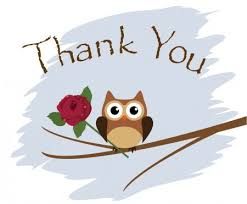